# Day 06: Machine Learning

Example from [Deep Learning with Python](https://livebook.manning.com/#!/book/deep-learning-with-python/chapter-2/1).

## Example: MNIST Sample Digits

**Goal**: Classify grayscale images of handwritten digits into 10 categories (0 through 9.)

### Load MNIST dataset from Keras

 1. `train_images` and `train_labels` are the **training set** (the data the model will learn from)

2. `test_images` and `test_labels` are the **test set** (what we will measure the generated model against)


In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Explore Training dataset

In [5]:
# Training images

train_images.shape

(60000, 28, 28)

In [11]:
# Training labels (classification)

train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

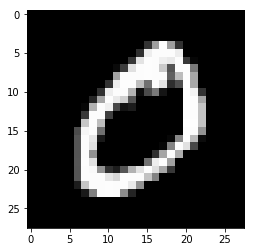

In [12]:
# View images from training set

import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap='gray')

### Configure Network Architecture

Create a simple sequential model with multiple layers of neural networks.

In [15]:
from keras import models
from keras import layers

# Create sequential network model
network = models.Sequential()

# Add a fully connected or dense layer with rectified linear unit activation 
# function
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Add a fully connected or dense layer which will return an array of 10 
# probability socres (summing to 1)
network.add(layers.Dense(10, activation='softmax'))

W0627 21:35:47.203953 140102023522176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 21:35:47.247136 140102023522176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 21:35:47.254348 140102023522176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### Compile Network

To get network ready for training, we must perform compilation in order to specify the following:

1. **Loss Function**: how to measure the network's performance.

2. **Optimizer**: what mechanism to use to update the weights.

3. **Metrics**: what to monitor during training and testing.

In [0]:
network.compile(
  optimizer = 'rmsprop',
    loss    = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

### Prepare Image Data

We need to preprocess the data to make it easier for our neural networks to manipulate.

> Flatten images into 1-d arrays where each value is between 0 and 1 (float32)

In [0]:
# Flatten training images

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [0]:
# Flatten testing images

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Prepare Labels

We also need to encode the labels.

In [0]:
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Train Network!

In [23]:
# epochs:     How many times to go through dataset
# batch_size: Size of each batch (how many to process in parallel)


network.fit(train_images, train_labels, epochs=5, batch_size=128)

W0627 21:41:12.584980 140102023522176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0627 21:41:12.651000 140102023522176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 5s 92us/step - loss: 0.2569 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.1019 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0673 - acc: 0.9803
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0492 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0364 - acc: 0.9892


### Test Network!



In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('Test Accurancy = {:.2f}%'.format(test_acc*100.0))

10000/10000 [==============================] - 0s 45us/step
Test Accurancy = 97.79%
